<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modul 10 GLOBAL THRESHOLDING

1. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

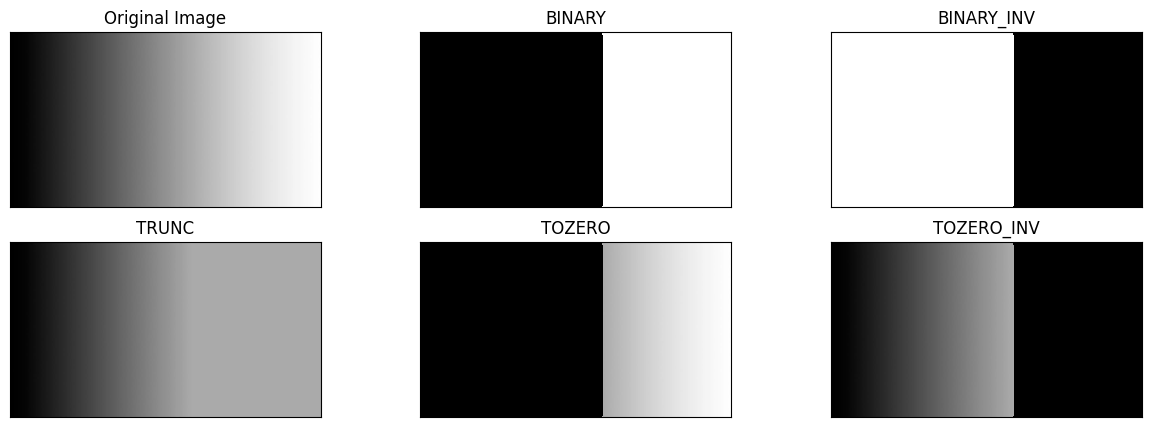

In [3]:
image = ('/content/drive/MyDrive/PCVK/gradient.jpg')

img = cv2.imread(image)
thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)

#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)

#3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)

#4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)

#5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

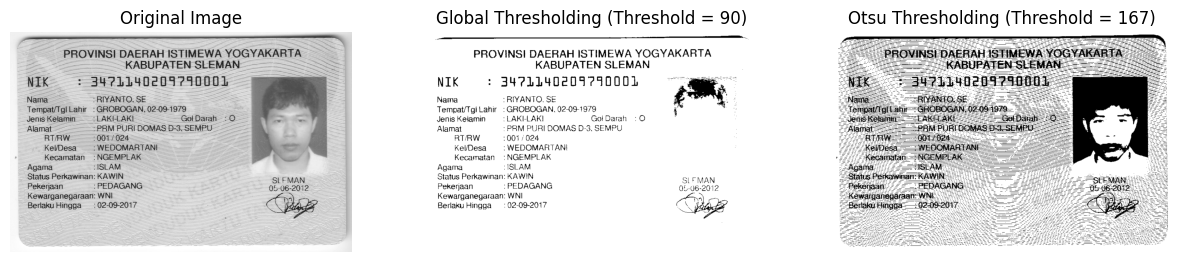

In [4]:
def otsu_thresholding(image):
    # Menghitung histogram gambar
    hist = cv2.calcHist([image], [0], None, [256], [0,256])
    hist_norm = hist.ravel() / hist.max()

    Q = hist_norm.cumsum()

    bins = np.arange(256)

    fn_min = np.inf
    thresh = -1

    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])
        q1, q2 = Q[i], Q[255] - Q[i]
        if q1 == 0 or q2 == 0:
            continue

        b1, b2 = np.hsplit(bins, [i])

        # Menghitung varian di setiap threshold
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2

        # Menghitung fungsi objektif untuk Otsu
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i

    return thresh

def global_thresholding(image, threshold):
    ret, global_thresh = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return global_thresh

# Baca gambar
image = ('/content/drive/MyDrive/PCVK/ktp_riyanto.jpg')
img = cv2.imread(image, 0)  # Membaca gambar dalam skala keabuan

# Menentukan nilai threshold untuk global thresholding
global_thresh_value = 90

# Menggunakan Otsu's Thresholding
otsu_threshold = otsu_thresholding(img)
ret, otsu = cv2.threshold(img, otsu_threshold, 255, cv2.THRESH_BINARY)

# Melakukan Global Thresholding
global_img = global_thresholding(img, global_thresh_value)

# Menampilkan hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(global_img, cmap='gray')
plt.title('Global Thresholding (Threshold = ' + str(global_thresh_value) + ')')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(otsu, cmap='gray')
plt.title('Otsu Thresholding (Threshold = ' + str(otsu_threshold) + ')')
plt.axis('off')

plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

    a. anda dapat gunakan cv.calcHist untuk menampilkan histogram. <br>

    b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html <br>

    c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameteryaitu mask. Jika diset None, maka keseluruhan image akan dihitunghistogramnya. Jika kita tentukan mask, maka hanya bagian image yangdimasking warna putih yang akan dihitung histogramnya (dari contoh
    dibawah dinamakan dengan Citra Segment).



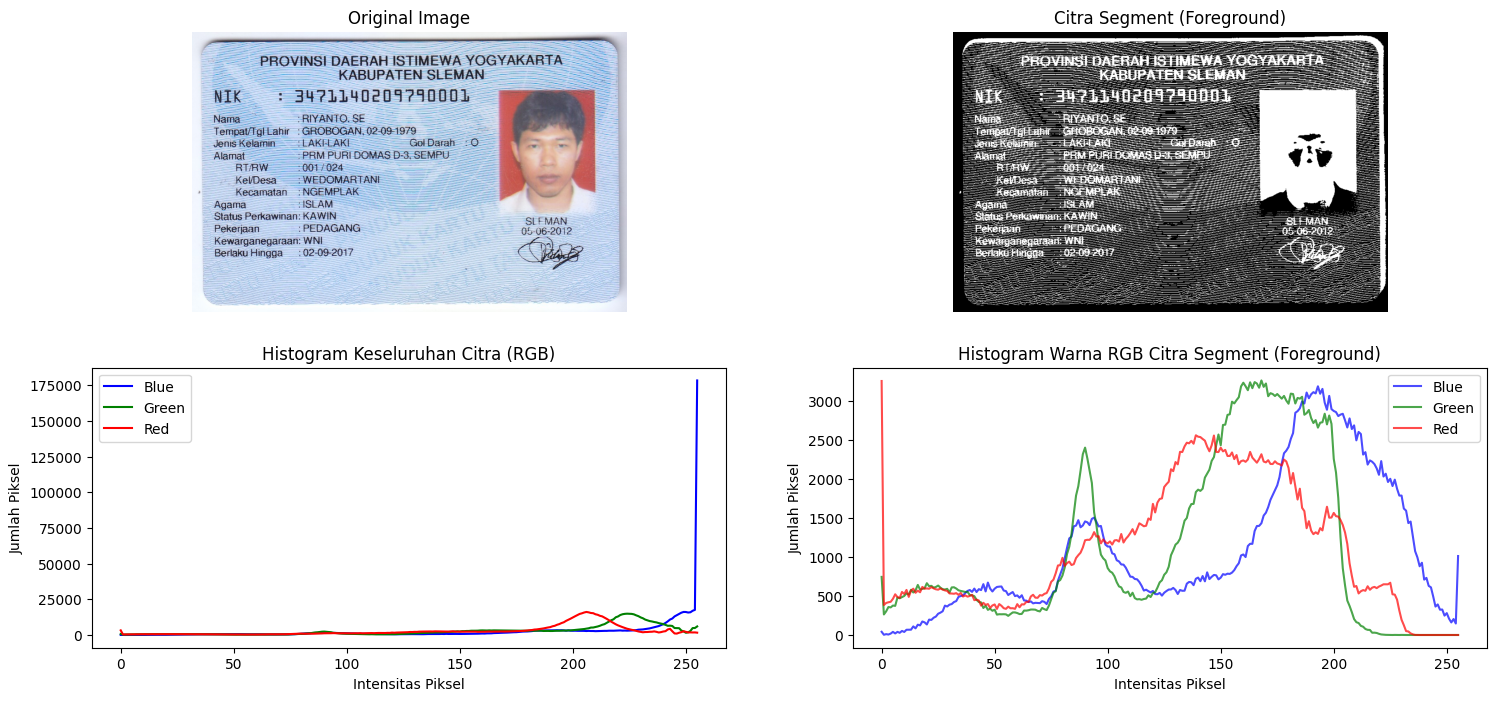

In [5]:
# Baca gambar
image = ('/content/drive/MyDrive/PCVK/ktp_riyanto.jpg')
img = cv2.imread(image)

# Konversi ke citra keabuan
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Lakukan segmentasi (contoh: global thresholding)
ret, thresholded = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
foreground = cv2.bitwise_not(thresholded)

# Pisahkan saluran warna (BGR)
b, g, r = cv2.split(img)

# Hitung histogram untuk setiap saluran warna pada citra keseluruhan
hist_full_b = cv2.calcHist([b], [0], None, [256], [0, 256])
hist_full_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_full_r = cv2.calcHist([r], [0], None, [256], [0, 256])

# Hitung histogram untuk setiap saluran warna pada citra segmentasi
hist_segmented_b = cv2.calcHist([b], [0], foreground, [256], [0, 256])
hist_segmented_g = cv2.calcHist([g], [0], foreground, [256], [0, 256])
hist_segmented_r = cv2.calcHist([r], [0], foreground, [256], [0, 256])

plt.figure(figsize=(18, 8))

# Tampilkan gambar asli
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Tampilkan citra segment (foreground)
plt.subplot(2, 2, 2)
plt.imshow(foreground, cmap='gray')
plt.title('Citra Segment (Foreground)')
plt.axis('off')

# Tampilkan histogram untuk keseluruhan citra (RGB)
plt.subplot(2, 2, 3)
plt.plot(hist_full_b, color='blue', label='Blue')
plt.plot(hist_full_g, color='green', label='Green')
plt.plot(hist_full_r, color='red', label='Red')
plt.title('Histogram Keseluruhan Citra (RGB)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

# Tampilkan histogram warna RGB pada citra segment (foreground)
plt.subplot(2, 2, 4)
plt.plot(hist_segmented_b, color='blue', label='Blue', alpha=0.7)
plt.plot(hist_segmented_g, color='green', label='Green', alpha=0.7)
plt.plot(hist_segmented_r, color='red', label='Red', alpha=0.7)
plt.title('Histogram Warna RGB Citra Segment (Foreground)')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Jumlah Piksel')
plt.legend()

plt.show()

6. Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

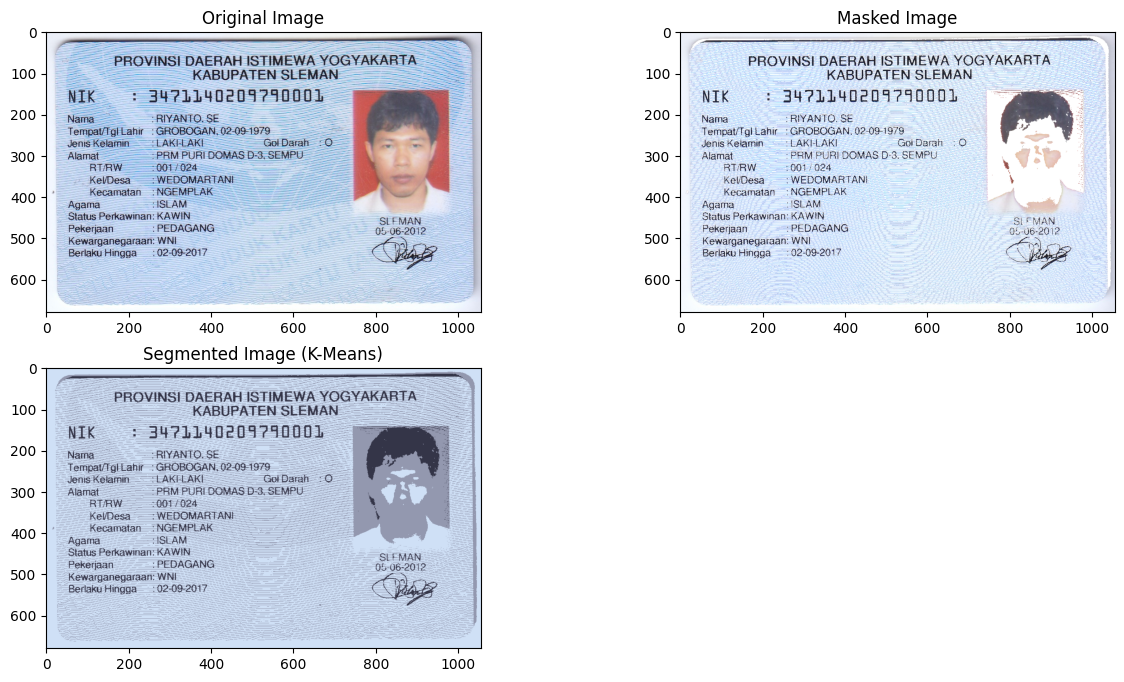

In [6]:
from sklearn.cluster import KMeans

# Load the image
image = ('/content/drive/MyDrive/PCVK/ktp_riyanto.jpg')
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

### Berikut adalah proses konversi gambar KTP menjadi teks yang dapat mengenali tulisan.

1. Install PIP OCR

In [24]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


2. Menambahkan axis kedalam objek figure dengan method add_subplot(). kemudian kita
tunjukan objek figure kita dengan method show()


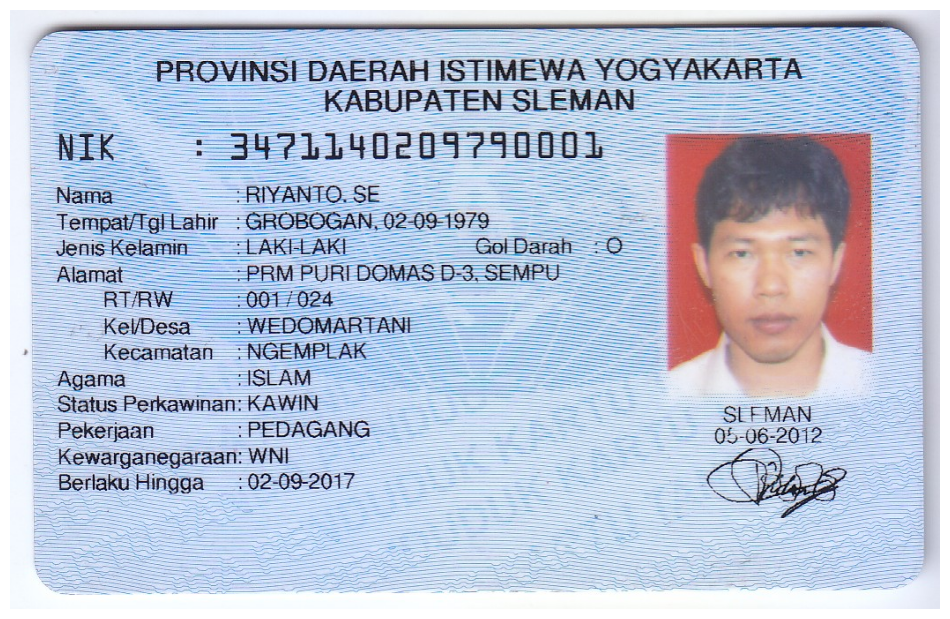

In [25]:
# Load the image using cv2.imread()
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp_riyanto.jpg')  # Read the image using cv2

# Convert image to RGB (since OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a figure and add a subplot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()  # Show the image


3. Python-tesseract akan mencetak teks yang dikenali dan menyimpannya kedalam file

In [42]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)

# Extract text using pytesseract
text2 = pytesseract.image_to_string(threshed, lang="ind")

# Save the recognized text to a file
with open('/content/drive/MyDrive/PCVK/ktp_riyanto_text.txt', 'w') as f:
    f.write(text2)

print(text2)  # Print recognized text


em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI
kecamatan : NGEMPLAK

Agama "ISLAM
Status Perkawinan: KAWIN SL! MAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI

Berlaku Hingga 92-09-2011 “AA c

   
 



4. Menambahkan kotak untuk deteksi teksi pada gambar

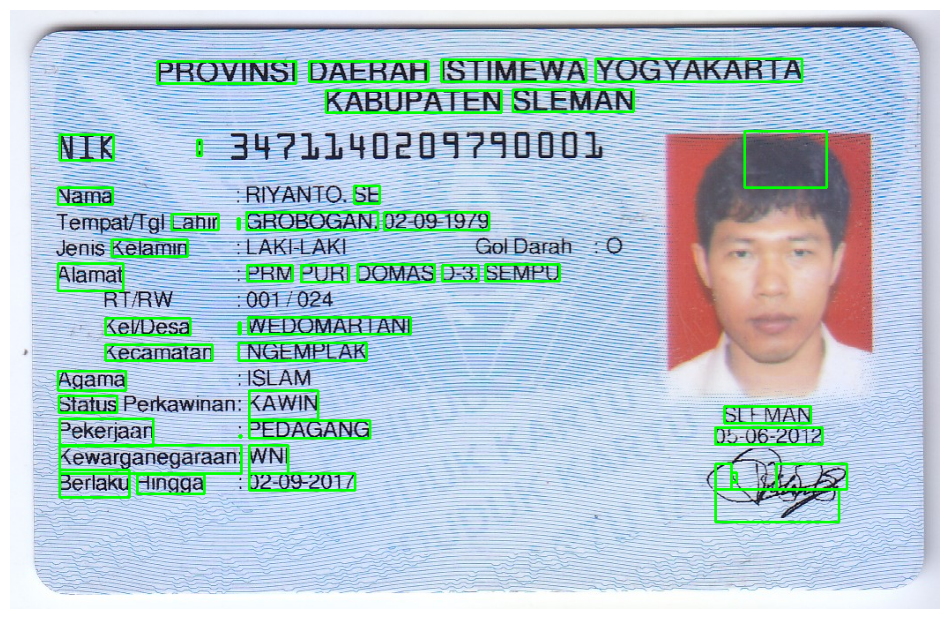

In [27]:
# Get the bounding boxes
data = pytesseract.image_to_data(threshed, output_type='data.frame')

# Iterate through each word detected
for i, row in data.iterrows():
    if row['conf'] > 60:  # Only consider confident detections
        (x, y, w, h) = (row['left'], row['top'], row['width'], row['height'])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a rectangle around detected text

# Show the image with rectangles
img_with_boxes = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(img_with_boxes)
plt.axis('off')  # Hide axis
plt.show()  # Show the image with detected boxes


5. Hasil pembacaan KTP Menjadi text

Hasil Pembacaan Teks:
em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 



(-0.5, 1054.5, 679.5, -0.5)

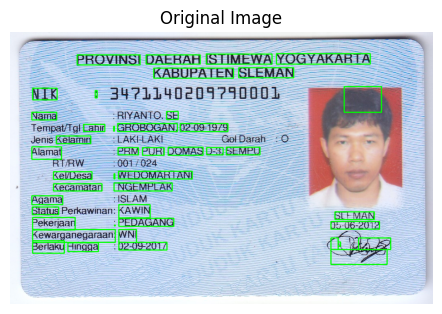

In [28]:
# Print recognized text
print("Hasil Pembacaan Teks:")
print(text2)

# Display the original and thresholded images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

### F. Tugasnya adalah mengimplementasikan hasil citra yang telah diproses denganGLOBAL THRESHOLDING dan hasilnya diproses untuk membaca teks yang terdapatpada KTP.

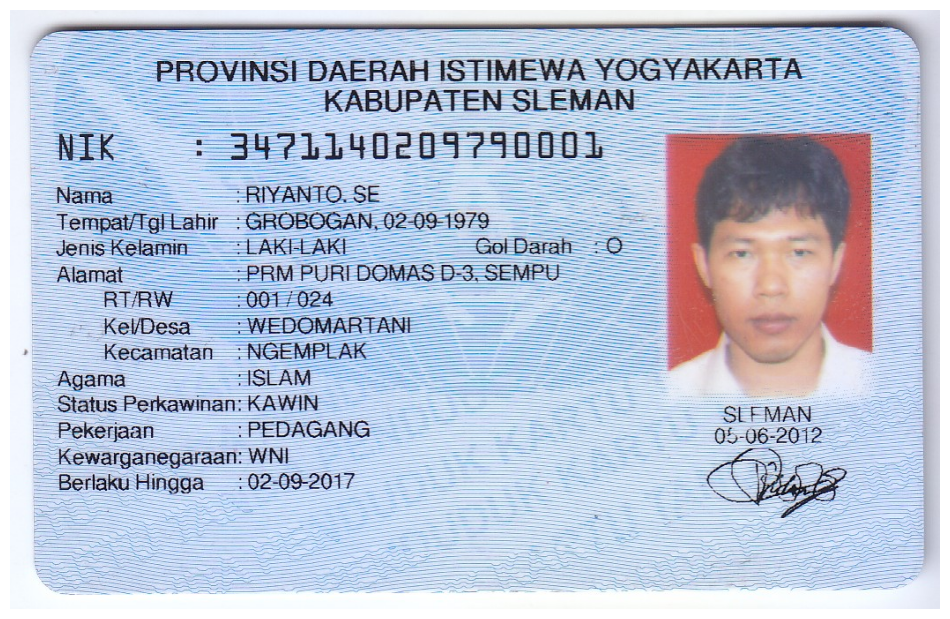

In [45]:
# Load the image using cv2.imread()
img = cv2.imread('/content/drive/MyDrive/PCVK/ktp_riyanto.jpg')  # Read the image using cv2

# Convert image to RGB (since OpenCV loads images in BGR format)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a figure and add a subplot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.imshow(img_rgb)
plt.axis('off')  # Hide axis
plt.show()  # Show the image


In [46]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
global_threshold, ktp_thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Extract text using pytesseract
text3 = pytesseract.image_to_string(threshed, lang="ind")

# Save the recognized text to a file
with open('/content/drive/MyDrive/PCVK/ktp_riyanto_text.txt', 'w') as f:
    f.write(text3)

print(text3)  # Print recognized text


em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI
kecamatan : NGEMPLAK

Agama "ISLAM
Status Perkawinan: KAWIN SL! MAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI

Berlaku Hingga 92-09-2011 “AA c

   
 



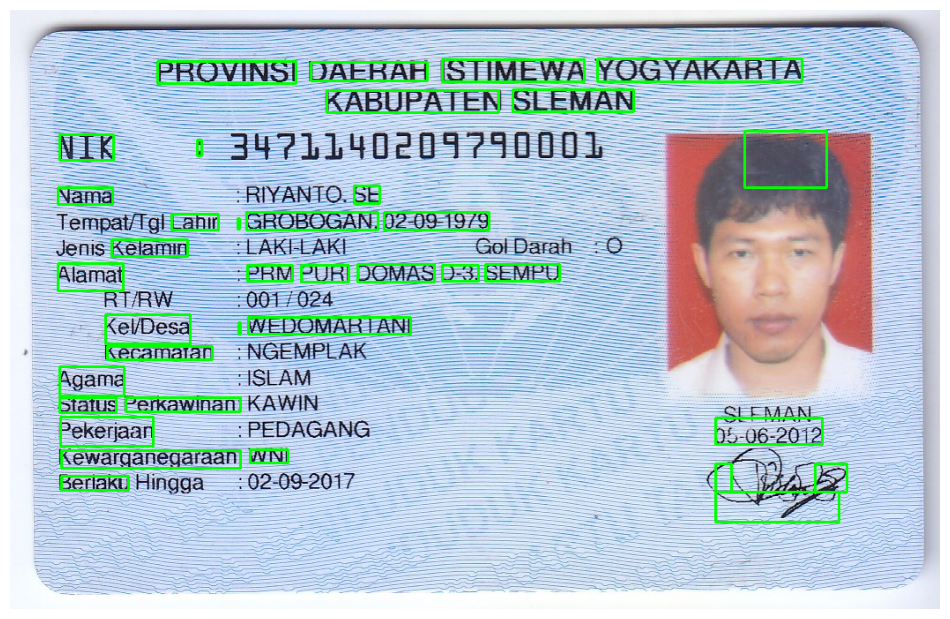

In [47]:
# Get the bounding boxes
data = pytesseract.image_to_data(threshed, output_type='data.frame')

# Iterate through each word detected
for i, row in data.iterrows():
    if row['conf'] > 60:  # Only consider confident detections
        (x, y, w, h) = (row['left'], row['top'], row['width'], row['height'])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw a rectangle around detected text

# Show the image with rectangles
img_with_boxes = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib
plt.figure(figsize=(12, 10))
plt.imshow(img_with_boxes)
plt.axis('off')  # Hide axis
plt.show()  # Show the image with detected boxes


Hasil Pembacaan Teks:
em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI
kecamatan : NGEMPLAK

Agama "ISLAM
Status Perkawinan: KAWIN SL! MAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI

Berlaku Hingga 92-09-2011 “AA c

   
 



(-0.5, 1054.5, 679.5, -0.5)

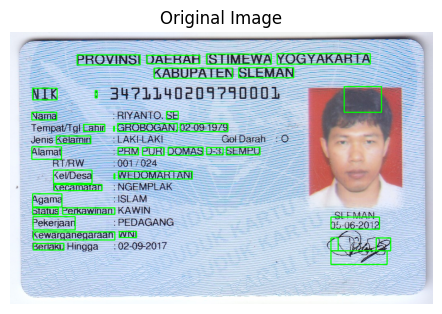

In [48]:
# Print recognized text
print("Hasil Pembacaan Teks:")
print(text3)

# Display the original and thresholded images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')